# **TASK 1 - Prediction using Supervised ML**

To Predict the percentage of marks of the students based on the number of hours they studied

## Author - TINU MARY RAJAN


In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Load the Data 
st_marks= pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
st_marks.shape

(25, 2)

###### This means that our dataset has 25 rows and 2 columns. Let's take a look at what our dataset actually looks like. To do this, use the head() method:

In [4]:
st_marks.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


###### The above method retrieves the first 5 records from our dataset, which will look like this

#### To see statistical details of the dataset, we can use describe():

In [5]:
st_marks.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# Check if there any missing  value in the Dataset
st_marks.isnull == True

False

In [7]:
st_marks.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Insight
**There is no null value in the Dataset so, we can now visualize our Data.**

#### And finally, let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

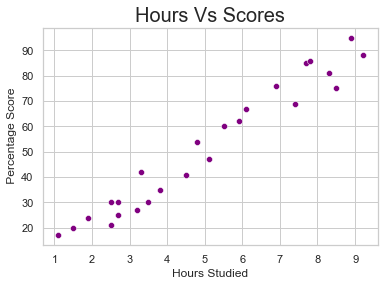

In [8]:
sns.set_theme(style="whitegrid")
sns.scatterplot(y= st_marks['Scores'], x= st_marks['Hours'],color='purple')
plt.title('Hours Vs Scores',size=20)
plt.ylabel(' Percentage Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**In the script above, we use plot() function of the pandas dataframe and pass it the column names for x coordinate and y coordinate, which are "Hours" and "Scores" respectively.**
**From the above scatter plot there looks to be correlation between the ' Percentage Score' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

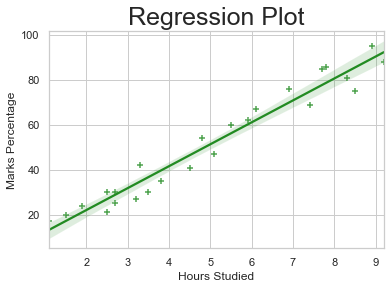

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:

sns.regplot(x= st_marks['Hours'], y= st_marks['Scores'],marker='+',color='forestgreen')
plt.title('Regression Plot',size=25)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(st_marks.corr())

**The resulting plot will look like this.From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Model Training


### Preparing the Data
**Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns. We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:**

In [10]:
# Defining X and y from the Data
X = st_marks.iloc[:, :-1].values  
y = st_marks.iloc[:, 1].values



**The attributes are stored in the X variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1. Remember, the column indexes start with 0, with 1 being the second column. In the next section, we will see a better way to specify columns for attributes and labels.**

<br>**Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:**<br>

In [26]:
# Splitting the Data in two
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

**The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set**

### Fitting the Data into the model

In [27]:
regression = LinearRegression()
regression.fit(X_train, y_train)
print("---------Model Trained---------")

---------Model Trained---------


## Predicting the Percentage of Marks

In [28]:
y_pred = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Score': [k for k in y_pred]})
prediction

,Hours,Predicted Score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


## Comparing the Predicted Score with the Actual Marks

In [29]:
compare_scores = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
compare_scores

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Visually Comparing the Predicted Score with the Actual Score

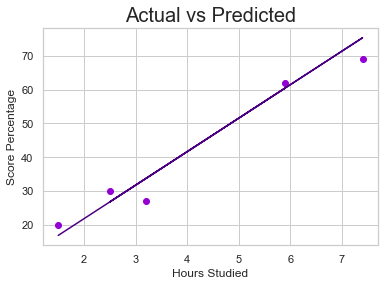

In [30]:
plt.scatter(x=X_test, y=y_test, c='darkviolet',
            linewidths = 2,
            marker ="^", 
            edgecolor ="red")
plt.plot(X_test, y_pred, color='indigo')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Model Evaluation

**The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:**

**Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
Mean Squared Error (MSE) is the mean of the squared errors 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
Luckily, we don't have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.**

**Let's find the values for these metrics using our test data. Execute the following code**

In [31]:
# Calculating the accuracy of the model
from sklearn import metrics
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error:  4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


**You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

## What will be the predicted score of a student if he/she studies for 9.25hrs/ day?

In [32]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.692 marks.**